In [1]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Conv1D, Flatten, MaxPooling1D, AveragePooling1D, Concatenate, LeakyReLU
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:
df = pickle.load(open('dataset_vBalanced.pkl', 'rb'))
df.head()

,Target_Vec_0,Target_Vec_1,Target_Vec_2,Target_Vec_3,Target_Vec_4,Target_Vec_5,Target_Vec_6,Target_Vec_7,Target_Vec_8,Target_Vec_9,...,Drug_Vec_91,Drug_Vec_92,Drug_Vec_93,Drug_Vec_94,Drug_Vec_95,Drug_Vec_96,Drug_Vec_97,Drug_Vec_98,Drug_Vec_99,Class
0,0.001179,-0.000599,0.000487,-0.000306,0.000802,-0.000354,0.001005,-0.000329,-0.000619,-0.000425,...,-0.027773,-0.261224,-0.349108,0.229779,0.161475,0.124695,0.368989,-0.198983,-0.435481,1
1,-0.000027,-0.001464,-0.000131,0.000246,0.000441,-0.000762,0.000180,-0.000694,-0.000680,-0.000532,...,-0.009263,-0.166779,-0.276308,0.178456,0.128912,0.083457,0.357332,-0.184330,-0.500235,1
2,-0.000604,-0.001193,-0.000205,-0.000217,0.000200,-0.000553,0.000444,-0.001070,-0.001007,-0.000424,...,-0.009263,-0.166779,-0.276308,0.178456,0.128912,0.083457,0.357332,-0.184330,-0.500235,1
3,0.000288,0.000009,-0.000214,-0.000342,-0.000452,-0.000095,0.000965,-0.000946,-0.000221,-0.000475,...,-0.197189,-0.190077,-0.227381,0.206817,0.102296,0.015936,0.315439,-0.296255,-0.259058,1
4,-0.000474,-0.000635,0.000419,-0.000580,-0.000105,-0.000468,0.000574,-0.001202,0.000006,-0.000512,...,-0.197189,-0.190077,-0.227381,0.206817,0.102296,0.015936,0.315439,-0.296255,-0.259058,1


In [3]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, train_size=0.8)

In [7]:
def plotHeatmap(m, test_ip, test_y, keras=True):
    y_pred = m.predict(test_ip)
    if keras:
        y_pred = [1 if y[0]>=0.5 else 0 for y in y_pred ]
    arr = confusion_matrix(test_y, y_pred)
    df_cm = pd.DataFrame(arr, index = ['False', 'True'],
                      columns =  ['False', 'True'])
    plt.figure(figsize = (10,10))
    sns.heatmap(df_cm, annot=True, fmt='.1f')
    plt.xlabel('Predicted Outcome')
    plt.ylabel('True Outcome')
    plt.title('F1 Score ' + str(f1_score(test_y, y_pred)))
    plt.show()

## Logistic

/home/sarthak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score of Logistic : 0.5828155512160483


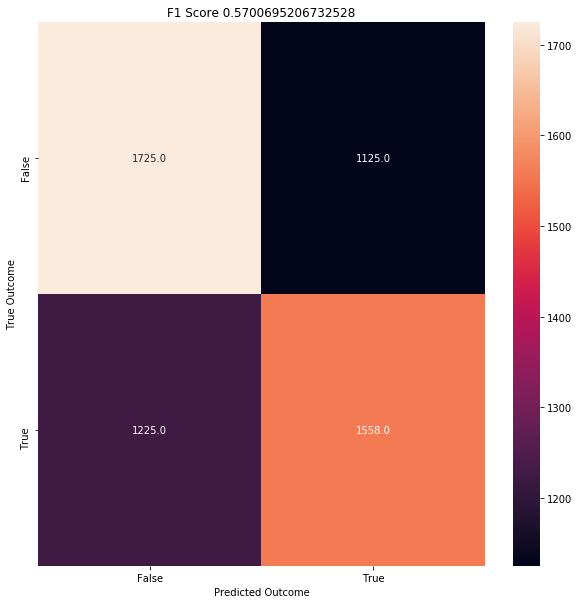

In [8]:
lr = LogisticRegression()
lr.fit(train_x, train_y)
print('Score of Logistic :', lr.score(test_x, test_y))
plotHeatmap(lr, test_x, test_y, keras=False)

## Deep NN

In [27]:
ipDim = train_x.shape[1]
model = Sequential()
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(550, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# plot_model(model, to_file='Model-DN1.svg', show_layer_names=True, show_shapes=True)

In [28]:
model.fit(train_x, train_y, epochs=300, batch_size=128)

Epoch 1/300
22529/22529 [==============================] - 3s 138us/step - loss: 0.6895 - acc: 0.5400
Epoch 2/300
22529/22529 [==============================] - 2s 97us/step - loss: 0.6778 - acc: 0.5680
Epoch 3/300
22529/22529 [==============================] - 2s 95us/step - loss: 0.6694 - acc: 0.5823
Epoch 4/300
22529/22529 [==============================] - 2s 91us/step - loss: 0.6633 - acc: 0.5894
Epoch 5/300
22529/22529 [==============================] - 2s 89us/step - loss: 0.6603 - acc: 0.5966
Epoch 6/300
22529/22529 [==============================] - 2s 94us/step - loss: 0.6553 - acc: 0.6027
Epoch 7/300
22529/22529 [==============================] - 2s 96us/step - loss: 0.6499 - acc: 0.6109
Epoch 8/300
22529/22529 [==============================] - 2s 96us/step - loss: 0.6449 - acc: 0.6133
Epoch 9/300
22529/22529 [==============================] - 2s 90us/step - loss: 0.6403 - acc: 0.6195
Epoch 10/300
22529/22529 [==============================] - 2s 87us/step - loss: 0.6380 - 

22529/22529 [==============================] - 2s 88us/step - loss: 0.5352 - acc: 0.7269
Epoch 82/300
22529/22529 [==============================] - 2s 88us/step - loss: 0.5349 - acc: 0.7232
Epoch 83/300
22529/22529 [==============================] - 2s 91us/step - loss: 0.5354 - acc: 0.7293
Epoch 84/300
22529/22529 [==============================] - 2s 88us/step - loss: 0.5331 - acc: 0.7286
Epoch 85/300
22529/22529 [==============================] - 2s 93us/step - loss: 0.5342 - acc: 0.7300
Epoch 86/300
22529/22529 [==============================] - 2s 97us/step - loss: 0.5358 - acc: 0.7280
Epoch 87/300
22529/22529 [==============================] - 2s 98us/step - loss: 0.5313 - acc: 0.7316
Epoch 88/300
22529/22529 [==============================] - 2s 89us/step - loss: 0.5315 - acc: 0.7312
Epoch 89/300
22529/22529 [==============================] - 2s 91us/step - loss: 0.5313 - acc: 0.7278
Epoch 90/300
22529/22529 [==============================] - 2s 89us/step - loss: 0.5348 - acc: 

22529/22529 [==============================] - 2s 89us/step - loss: 0.5043 - acc: 0.7525
Epoch 161/300
22529/22529 [==============================] - 2s 88us/step - loss: 0.5049 - acc: 0.7526
Epoch 162/300
22529/22529 [==============================] - 2s 89us/step - loss: 0.5024 - acc: 0.7509
Epoch 163/300
22529/22529 [==============================] - 2s 91us/step - loss: 0.5063 - acc: 0.7523
Epoch 164/300
22529/22529 [==============================] - 2s 91us/step - loss: 0.5035 - acc: 0.7508
Epoch 165/300
22529/22529 [==============================] - 2s 86us/step - loss: 0.5046 - acc: 0.7529
Epoch 166/300
22529/22529 [==============================] - 2s 89us/step - loss: 0.5012 - acc: 0.7542
Epoch 167/300
22529/22529 [==============================] - 2s 91us/step - loss: 0.5012 - acc: 0.7556
Epoch 168/300
22529/22529 [==============================] - 2s 93us/step - loss: 0.5017 - acc: 0.7544
Epoch 169/300
22529/22529 [==============================] - 2s 87us/step - loss: 0.502

22529/22529 [==============================] - 2s 92us/step - loss: 0.4881 - acc: 0.7641
Epoch 240/300
22529/22529 [==============================] - 2s 98us/step - loss: 0.4874 - acc: 0.7662
Epoch 241/300
22529/22529 [==============================] - 2s 85us/step - loss: 0.4828 - acc: 0.7679
Epoch 242/300
22529/22529 [==============================] - 2s 86us/step - loss: 0.4849 - acc: 0.7651
Epoch 243/300
22529/22529 [==============================] - 2s 87us/step - loss: 0.4875 - acc: 0.7651
Epoch 244/300
22529/22529 [==============================] - 2s 89us/step - loss: 0.4884 - acc: 0.7674
Epoch 245/300
22529/22529 [==============================] - 2s 85us/step - loss: 0.4854 - acc: 0.7660
Epoch 246/300
22529/22529 [==============================] - 2s 86us/step - loss: 0.4859 - acc: 0.7649
Epoch 247/300
22529/22529 [==============================] - 2s 85us/step - loss: 0.4840 - acc: 0.7675
Epoch 248/300
22529/22529 [==============================] - 2s 90us/step - loss: 0.485

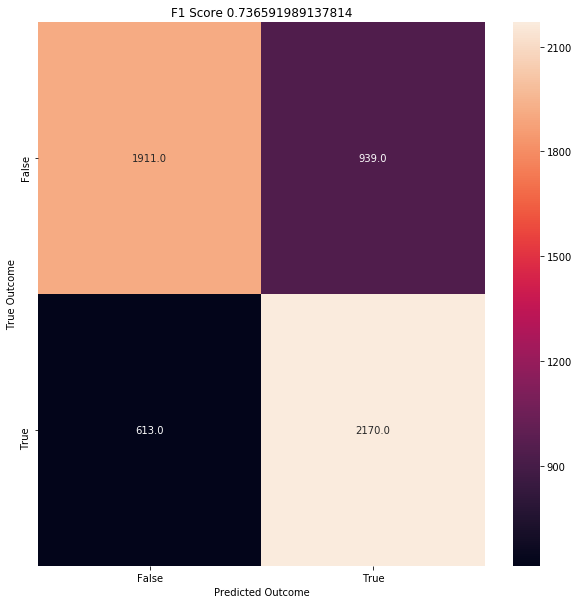

In [29]:
plotHeatmap(model, test_x, test_y)

## Deep Conv NN

In [12]:
ndata, nfeature = X.shape
X_Conv = X.reshape(ndata, nfeature, 1)
input_shape = (nfeature, 1)
ctrain_x, ctest_x, ctrain_y, ctest_y = train_test_split(X_Conv, Y, train_size=0.8)

In [13]:
model = Sequential()

model.add(Conv1D(filters=30, kernel_size=2, input_shape=input_shape,kernel_initializer= 'uniform')) 
model.add(LeakyReLU(alpha=0.3))
model.add(Conv1D(filters=10, kernel_size=2, kernel_initializer= 'uniform')) 
model.add(LeakyReLU(alpha=0.3))

model.add(Flatten())
model.add(Dense(100))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))
model.add(Dense(25))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [14]:
plot_model(model, to_file='Model-CNN1.svg', show_layer_names=True, show_shapes=True)

In [15]:
model.fit(ctrain_x, train_y, epochs=4, batch_size=32)

Epoch 1/4
22529/22529 [==============================] - 10s 440us/step - loss: 0.6937 - acc: 0.4996
Epoch 2/4
22529/22529 [==============================] - 8s 374us/step - loss: 0.6940 - acc: 0.4981
Epoch 3/4
22529/22529 [==============================] - 19s 841us/step - loss: 0.6940 - acc: 0.4996
Epoch 4/4
22529/22529 [==============================] - 16s 728us/step - loss: 0.6938 - acc: 0.4984


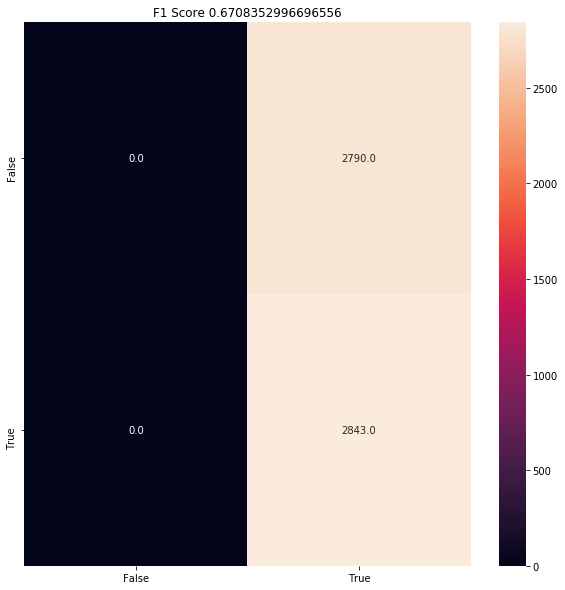

In [16]:
plotHeatmap(model, ctest_x, test_y)

## Deep Conv NN with seperate conv for target and drug

In [17]:
target = df.iloc[:, :30].values
drug = df.iloc[:, 30:-1].values
t_data, t_feature = target.shape
d_data, d_feature = drug.shape
t_input_shape = (t_feature, 1)
d_input_shape = (d_feature, 1)
train_idx, test_idx, dt_train_y, dt_test_y = train_test_split(np.arange(0, X.shape[0]), Y, train_size=0.8)
train_target = target[train_idx]
test_target = target[test_idx]
train_drug = drug[train_idx]
test_drug = drug[test_idx]

In [18]:
train_size = train_target.shape[0]
test_size = test_target.shape[0]

train_target = train_target.reshape(train_size, t_feature, 1)
test_target = test_target.reshape(test_size, t_feature, 1)
train_drug = train_drug.reshape(train_size, d_feature, 1)
test_drug = test_drug.reshape(test_size, d_feature, 1)

In [19]:
model1 = Sequential(layers=[
    # input layers and convolutional layers
    Conv1D(filters=30, kernel_size=2, input_shape=t_input_shape,kernel_initializer= 'uniform', activation= 'relu'),
    Conv1D(filters=10, kernel_size=2, kernel_initializer= 'uniform', activation= 'relu'),
    Dropout(.5),
    Flatten()
])

model2 = Sequential(layers=[
    # input layers and convolutional layers
    Conv1D(filters=15, kernel_size=2, input_shape=d_input_shape,kernel_initializer= 'uniform', activation= 'relu'),
    Conv1D(filters=10, kernel_size=2, kernel_initializer= 'uniform', activation= 'relu'),
    Dropout(.5),
    Flatten()

])

mergedOut = Concatenate()([model1.output,model2.output])
# mergedOut = Flatten()(mergedOut)    
mergedOut = Dense(256, activation='relu')(mergedOut)
mergedOut = Dropout(.5)(mergedOut)
mergedOut = Dense(128, activation='relu')(mergedOut)
mergedOut = Dropout(.35)(mergedOut)

# output layer
mergedOut = Dense(1, activation='sigmoid')(mergedOut)
newModel = Model([model1.input,model2.input], mergedOut)

newModel.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
plot_model(newModel, to_file='Model-CNN2.svg', show_layer_names=True, show_shapes=True)

In [21]:
newModel.fit([train_target, train_drug], dt_train_y,epochs=15, batch_size=32)   

Epoch 1/15
22529/22529 [==============================] - 28s 1ms/step - loss: 0.6932 - acc: 0.5057
Epoch 2/15
22529/22529 [==============================] - 26s 1ms/step - loss: 0.6917 - acc: 0.5246
Epoch 3/15
22529/22529 [==============================] - 26s 1ms/step - loss: 0.6897 - acc: 0.5344
Epoch 4/15
22529/22529 [==============================] - 26s 1ms/step - loss: 0.6887 - acc: 0.5437
Epoch 5/15
22529/22529 [==============================] - 26s 1ms/step - loss: 0.6890 - acc: 0.5345
Epoch 6/15
22529/22529 [==============================] - 28s 1ms/step - loss: 0.6880 - acc: 0.5424
Epoch 7/15
22529/22529 [==============================] - 26s 1ms/step - loss: 0.6868 - acc: 0.5441
Epoch 8/15
22529/22529 [==============================] - 27s 1ms/step - loss: 0.6872 - acc: 0.5442
Epoch 9/15
22529/22529 [==============================] - 27s 1ms/step - loss: 0.6848 - acc: 0.5507
Epoch 10/15
22529/22529 [==============================] - 28s 1ms/step - loss: 0.6850 - acc: 0.5488

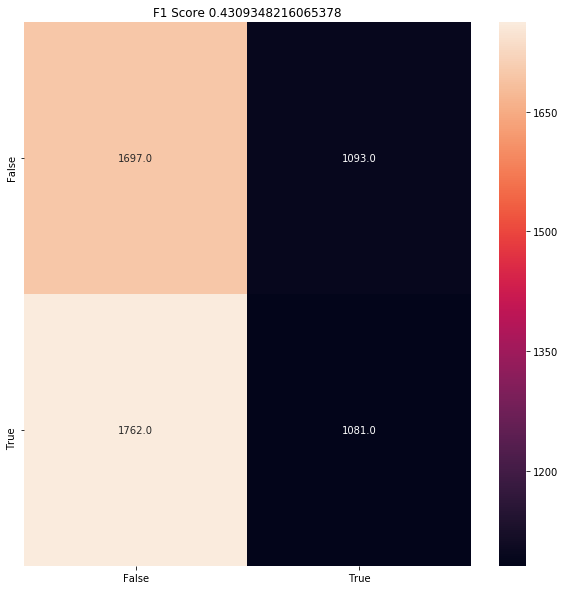

In [22]:
plotHeatmap(newModel, [test_target, test_drug], test_y)